# Week1

# Exercise question 5 and 6 for Dataset 2(Data2.xlsx)
## Questions

 Explore two different datasets provided in the shared folders with the following steps:
 
a. Import the required libraries.

b. Load the dataset.

c. Examine data information.

d. Identify and analyze null values using df. isnull().

e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)

f. Generate boxplots for each column to detect outliers.

g. Determine quartiles and remove outliers.

h. Calculate correlations and visualize them with a heatmap.

i. Normalize the various features of the given datasets. (MinMaxScaler)

j. Arrange correlation values for each attribute in ascending order.

### a. Import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### b. Load the dataset.

In [3]:
df=pd.read_excel("Data2.xlsx")

In [4]:
df.head()

,DISTCD,STATNAME,DISTNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,101,JAMMU & KASHMIR,KUPWARA,13,391,104,875564
1,102,JAMMU & KASHMIR,BARAMULA,18,678,144,1015503
2,103,JAMMU & KASHMIR,SRINAGAR,8,94,65,1269751
3,201,HIMACHAL PRADESH,CHAMBA,15,1150,266,518844
4,202,HIMACHAL PRADESH,KANGRA,19,1785,358,1507223


### c. Examine data information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DISTCD      32 non-null     int64 
 1   STATNAME    32 non-null     object
 2   DISTNAME    32 non-null     object
 3   BLOCKS      32 non-null     int64 
 4   VILLAGES    32 non-null     int64 
 5   CLUSTERS    32 non-null     int64 
 6   TOTPOPULAT  32 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [6]:
df.dtypes

DISTCD         int64
STATNAME      object
DISTNAME      object
BLOCKS         int64
VILLAGES       int64
CLUSTERS       int64
TOTPOPULAT     int64
dtype: object

### d. Identify and analyze null values using df. isnull().

In [7]:
df.isnull()

,DISTCD,STATNAME,DISTNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

DISTCD        0
STATNAME      0
DISTNAME      0
BLOCKS        0
VILLAGES      0
CLUSTERS      0
TOTPOPULAT    0
dtype: int64

no null values

### e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)

In [9]:
df.describe()

,DISTCD,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
count,32.000000,32.000000,32.000000,32.00000,3.200000e+01
mean,615.562500,10.906250,764.062500,126.87500,2.043326e+06
std,312.572979,6.034093,540.128595,104.32386,1.499800e+06
min,101.000000,3.000000,80.000000,6.00000,3.152800e+04
25%,310.750000,6.000000,318.750000,51.25000,8.814545e+05
50%,652.000000,9.000000,664.000000,83.00000,1.643436e+06
75%,902.250000,15.250000,1111.750000,175.00000,3.470142e+06
max,1006.000000,27.000000,1937.000000,378.00000,5.082868e+06


### f. Generate boxplots for each column to detect outliers.

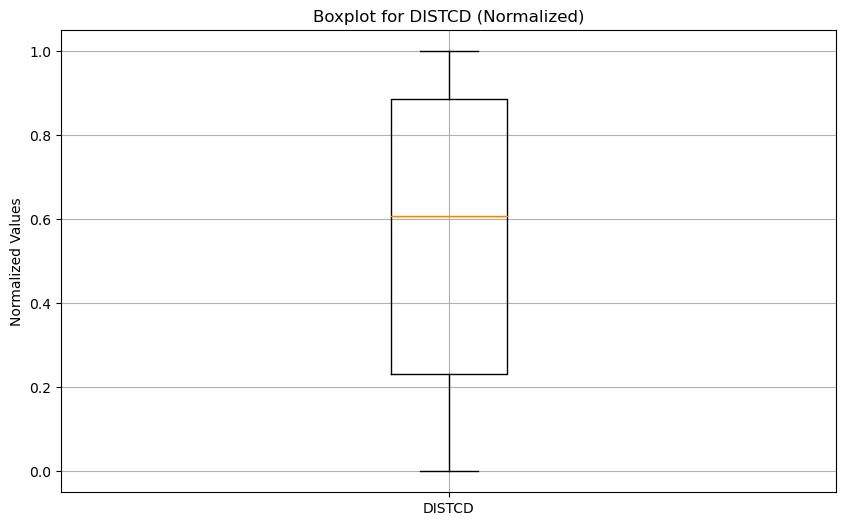

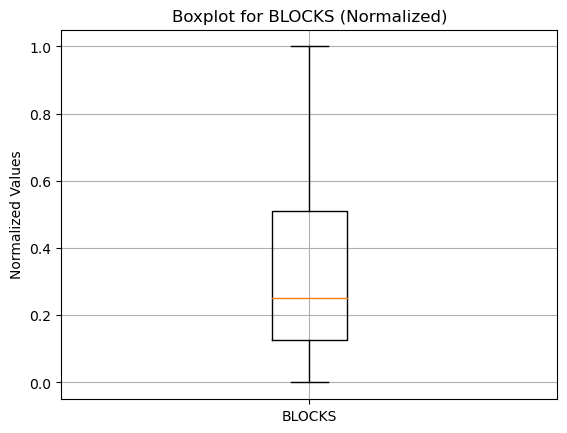

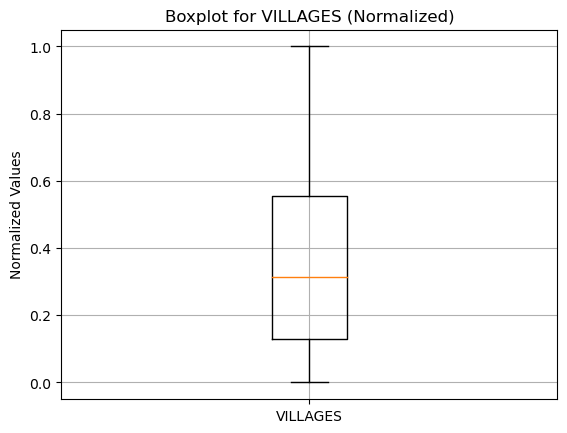

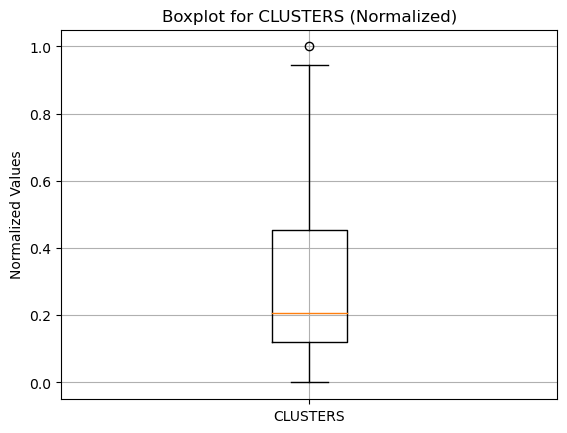

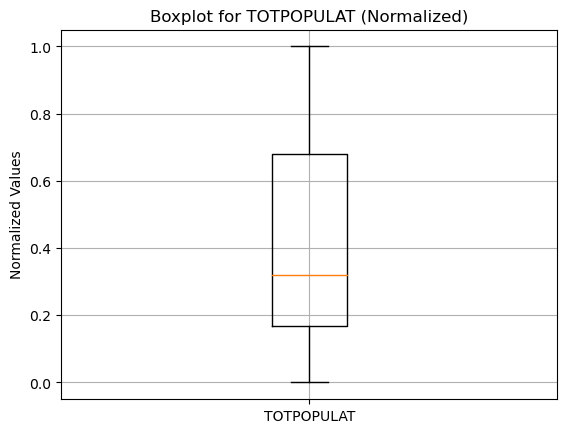

In [12]:

non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist()

numeric_columns = df.select_dtypes(include='number').columns.tolist()
df_normalized = df.copy()
for col in numeric_columns:
    df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

plt.figure(figsize=(10, 6))

for col in df_normalized.columns:
    if col not in non_numeric_columns:
        plt.boxplot(df_normalized[col], labels=[col])
        plt.title(f'Boxplot for {col} (Normalized)')
        plt.ylabel('Normalized Values')
        plt.grid(True)
        plt.show()


### g. Determine quartiles and remove outliers.

In [15]:
import pandas as pd

def replace_outliers_with_median(df):
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        col_median = df[col].median()
        df[col] = df[col].where((df[col] >= lower_limit) & (df[col] <= upper_limit), col_median)
    
    return df

df = replace_outliers_with_median(df)


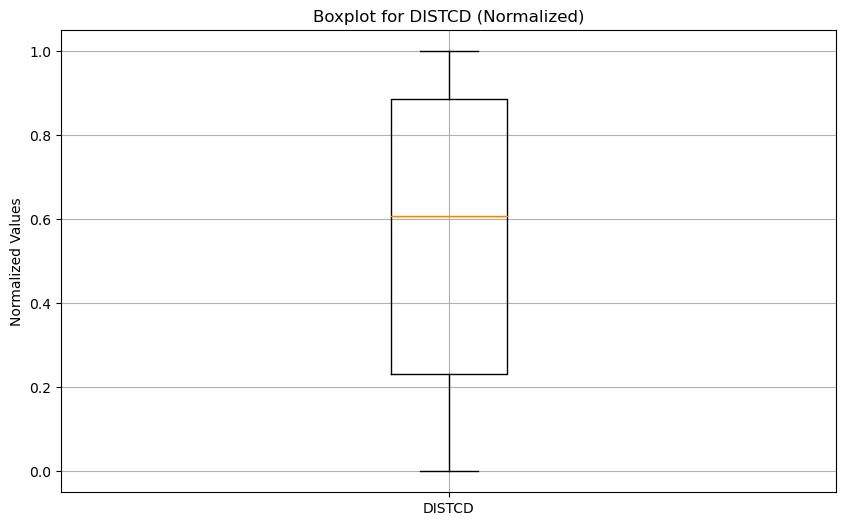

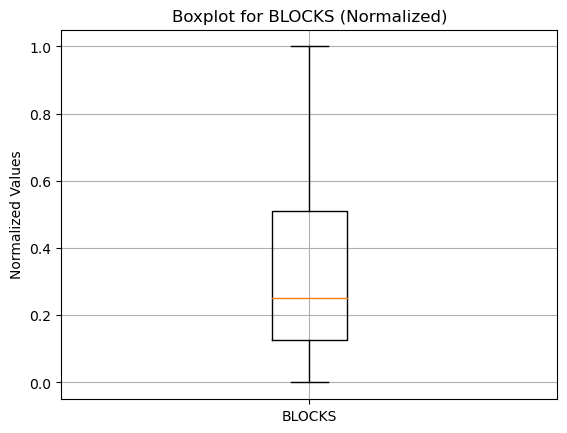

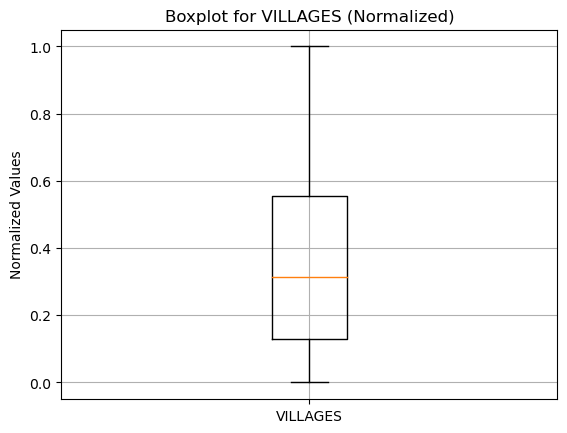

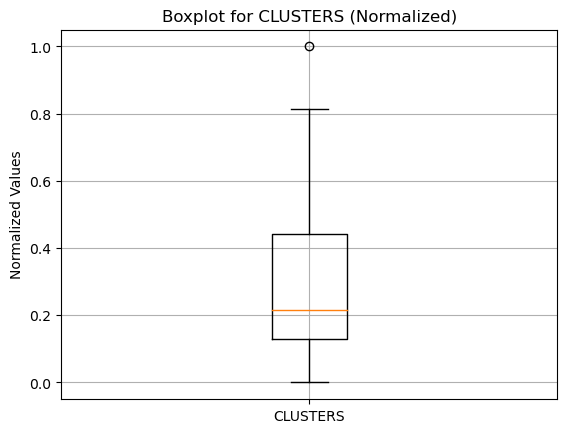

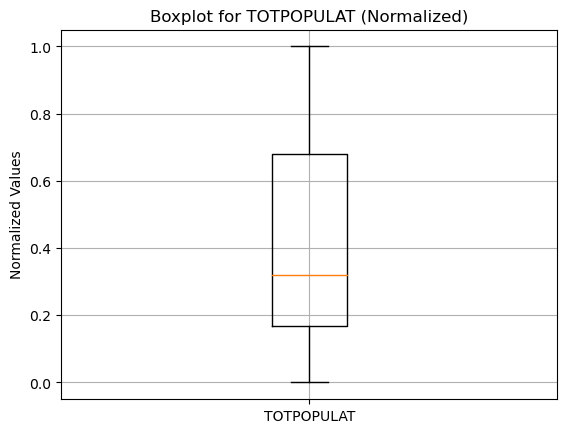

In [16]:
non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist()

numeric_columns = df.select_dtypes(include='number').columns.tolist()
df_normalized = df.copy()
for col in numeric_columns:
    df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

plt.figure(figsize=(10, 6))

for col in df_normalized.columns:
    if col not in non_numeric_columns:
        plt.boxplot(df_normalized[col], labels=[col])
        plt.title(f'Boxplot for {col} (Normalized)')
        plt.ylabel('Normalized Values')
        plt.grid(True)
        plt.show()

### h. Calculate correlations and visualize them with a heatmap.

In [20]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_df=df[numeric_columns]
numeric_df.head()

,DISTCD,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,0.000000,13,391,104,875564
1,0.001105,18,678,144,1015503
2,0.002210,8,94,65,1269751
3,0.110497,15,1150,266,518844
4,0.111602,19,1785,358,1507223


<Axes: >

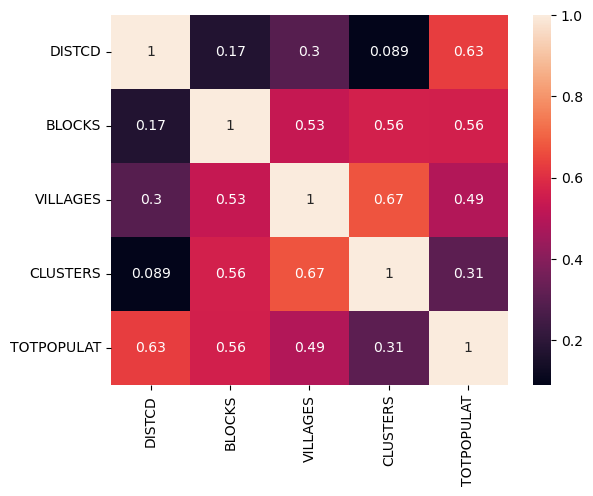

In [21]:
corr=numeric_df.corr()
sns.heatmap(corr,annot=True)

### i. Normalize the various features of the given datasets. (MinMaxScaler)

In [24]:
def minmaxscaler(df):
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    for col in numeric_columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df
df=minmaxscaler(df)
#to encode the categorical data
from sklearn.preprocessing import LabelEncoder
df["STATNAME"]=LabelEncoder().fit_transform(df["STATNAME"])
df["DISTNAME"]=LabelEncoder().fit_transform(df["DISTNAME"])
df.head()

,DISTCD,STATNAME,DISTNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,0.000000,5,11,0.416667,0.167474,0.278409,0.167092
1,0.001105,5,1,0.625000,0.322025,0.392045,0.194795
2,0.002210,5,28,0.208333,0.007539,0.167614,0.245128
3,0.110497,4,4,0.500000,0.576198,0.738636,0.096473
4,0.111602,4,10,0.666667,0.918148,1.000000,0.292139


### j. Arrange correlation values for each attribute in ascending order.

<Axes: >

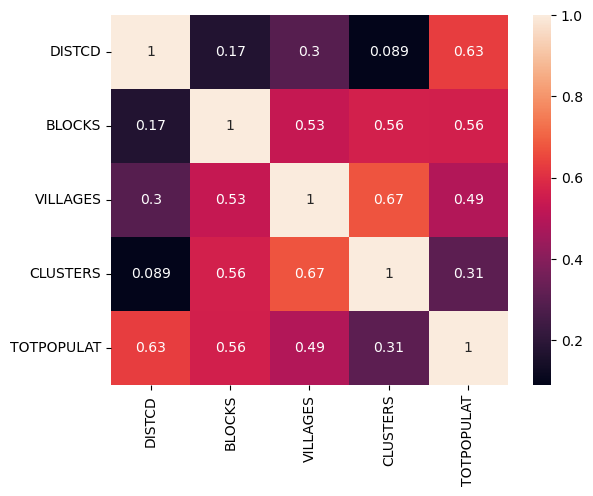

In [25]:
corr_matrix = numeric_df.corr()#after normalization
sns.heatmap(corr_matrix, annot=True)

In [26]:
def arrange_corr_values(df):
    for column in numeric_df.columns:
        print("for column->",column)
        print(corr_matrix[column].sort_values(ascending=True))

In [27]:
arrange_corr_values(df)

for column-> DISTCD
CLUSTERS      0.089456
BLOCKS        0.171932
VILLAGES      0.295476
TOTPOPULAT    0.630933
DISTCD        1.000000
Name: DISTCD, dtype: float64
for column-> BLOCKS
DISTCD        0.171932
VILLAGES      0.532225
TOTPOPULAT    0.559050
CLUSTERS      0.563770
BLOCKS        1.000000
Name: BLOCKS, dtype: float64
for column-> VILLAGES
DISTCD        0.295476
TOTPOPULAT    0.490269
BLOCKS        0.532225
CLUSTERS      0.674253
VILLAGES      1.000000
Name: VILLAGES, dtype: float64
for column-> CLUSTERS
DISTCD        0.089456
TOTPOPULAT    0.308218
BLOCKS        0.563770
VILLAGES      0.674253
CLUSTERS      1.000000
Name: CLUSTERS, dtype: float64
for column-> TOTPOPULAT
CLUSTERS      0.308218
VILLAGES      0.490269
BLOCKS        0.559050
DISTCD        0.630933
TOTPOPULAT    1.000000
Name: TOTPOPULAT, dtype: float64


# Exercise question 6
## Questions
Conduct a visual exploration of the given dataset by employing four distinct Python
plotting libraries: Matplotlib, Seaborn, Bokeh, and Plotly. Perform the following 
visualizations:

a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 
and (2) col3, col4 (3) col5, col6.

b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

c. Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

d. Histograms to depict the dataset's distribution

## Using Matplotlib library

### a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

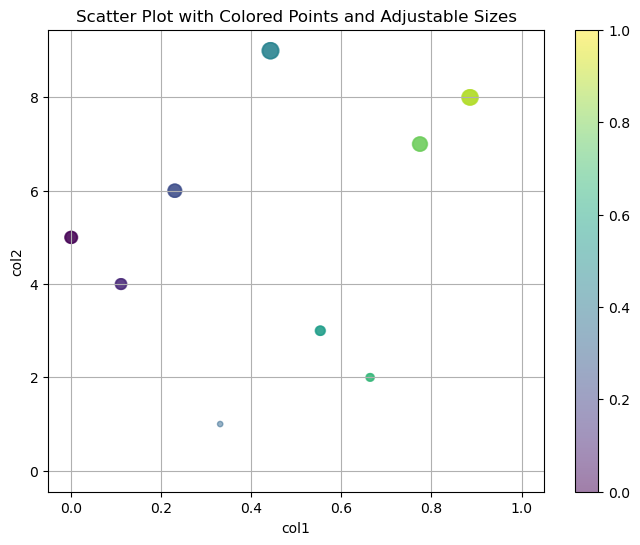

In [28]:
col1 = df['DISTCD']
col2 = df['STATNAME']


plt.figure(figsize=(8, 6))
plt.scatter(col1, col2, c=col1, s=col2*15, alpha=0.5, cmap='viridis')


plt.colorbar()  
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

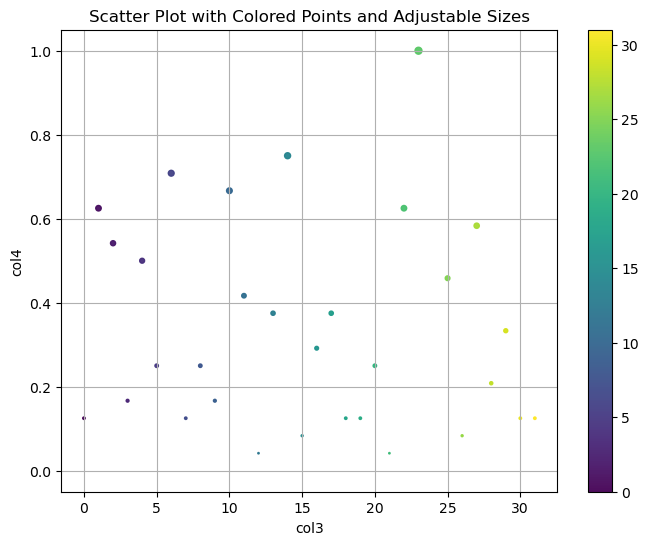

In [32]:
col3 = df['DISTNAME']
col4 = df['BLOCKS']


plt.figure(figsize=(8, 6))
plt.scatter(col3, col4, c=col3, s=col4*25, alpha=0.95, cmap='viridis')


plt.colorbar()  
plt.xlabel('col3')
plt.ylabel('col4')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

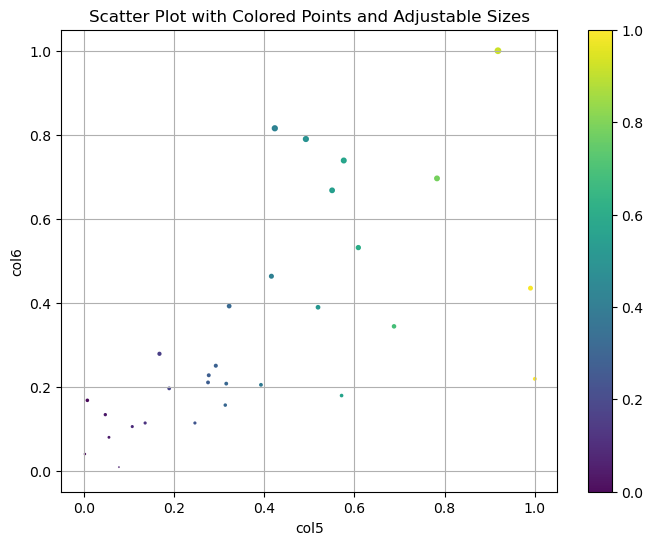

In [34]:
col5 = df['VILLAGES']
col6 = df['CLUSTERS']


plt.figure(figsize=(8, 6))
plt.scatter(col5, col6, c=col5, s=col6*15, alpha=0.95, cmap='viridis')


plt.colorbar()  
plt.xlabel('col5')
plt.ylabel('col6')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

### b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

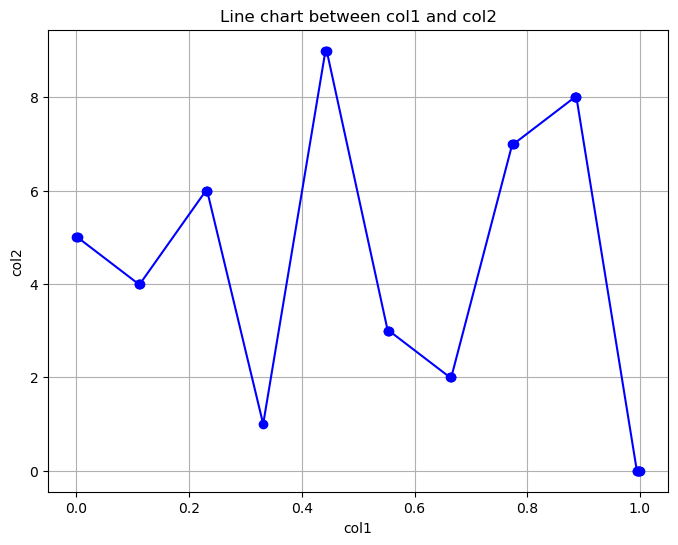

In [35]:
plt.figure(figsize=(8, 6))

# Line chart for col1 and col2
plt.plot(df['DISTCD'], df['STATNAME'], marker='o', linestyle='-', color='b')
plt.title('Line chart between col1 and col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.grid(True)
plt.show()

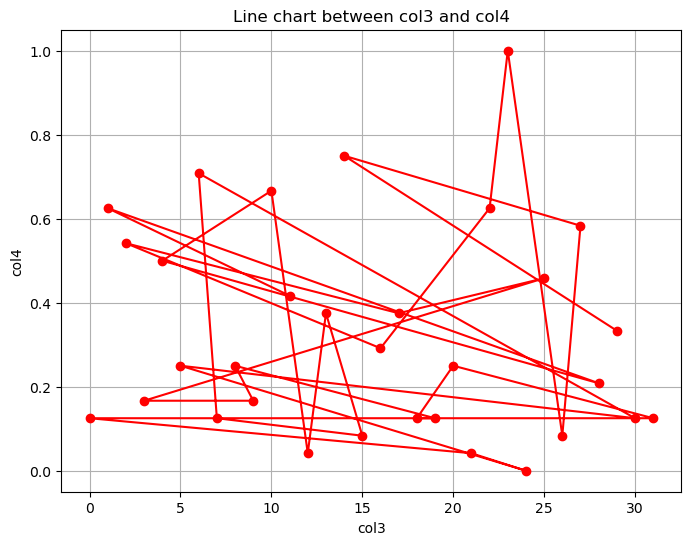

In [36]:
plt.figure(figsize=(8, 6))

# Line chart for col3 and col4
plt.plot(df['DISTNAME'], df['BLOCKS'], marker='o', linestyle='-', color='r')
plt.title('Line chart between col3 and col4')
plt.xlabel('col3')
plt.ylabel('col4')
plt.grid(True)
plt.show()

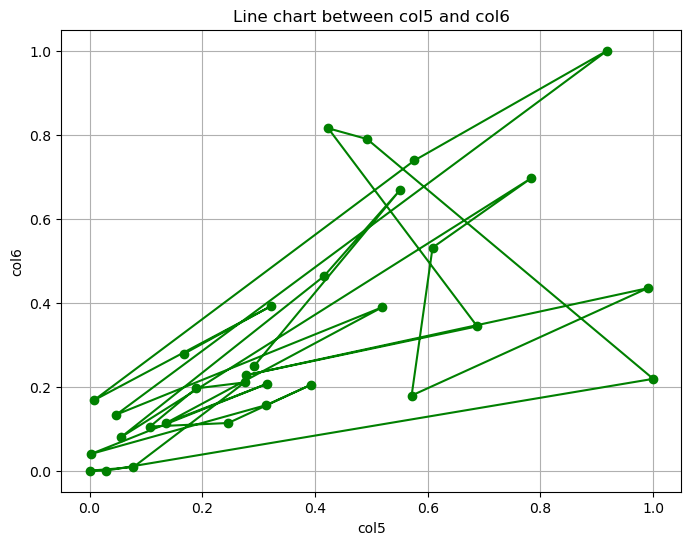

In [37]:
plt.figure(figsize=(8, 6))

# Line chart for col5 and col6
plt.plot(df['VILLAGES'], df['CLUSTERS'], marker='o', linestyle='-', color='g')
plt.title('Line chart between col5 and col6')
plt.xlabel('col5')
plt.ylabel('col6')
plt.grid(True)
plt.show()

### c. Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [39]:
df1=pd.read_excel("Data2.xlsx")
df1

,DISTCD,STATNAME,DISTNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT
0,101,JAMMU & KASHMIR,KUPWARA,13,391,104,875564
1,102,JAMMU & KASHMIR,BARAMULA,18,678,144,1015503
2,103,JAMMU & KASHMIR,SRINAGAR,8,94,65,1269751
3,201,HIMACHAL PRADESH,CHAMBA,15,1150,266,518844
4,202,HIMACHAL PRADESH,KANGRA,19,1785,358,1507223
5,203,HIMACHAL PRADESH,LAHUL & SPITI,4,168,53,31528
6,309,PUNJAB,LUDHIANA,12,1044,143,3487882
7,310,PUNJAB,MOGA,5,332,46,992289
8,311,PUNJAB,FIROZPUR,6,666,79,2026831
9,401,CHANDIGARH,CHANDIGARH,20,84,20,1054686


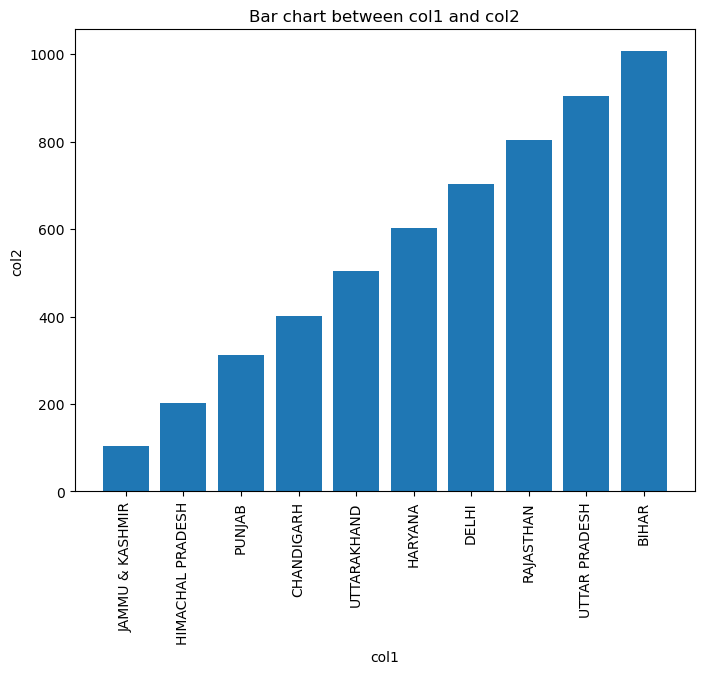

In [42]:
plt.figure(figsize=(8, 6))
plt.bar(x=df1['STATNAME'], height=df1['DISTCD'])
plt.title('Bar chart between col1 and col2')
plt.xticks(rotation=90)
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()


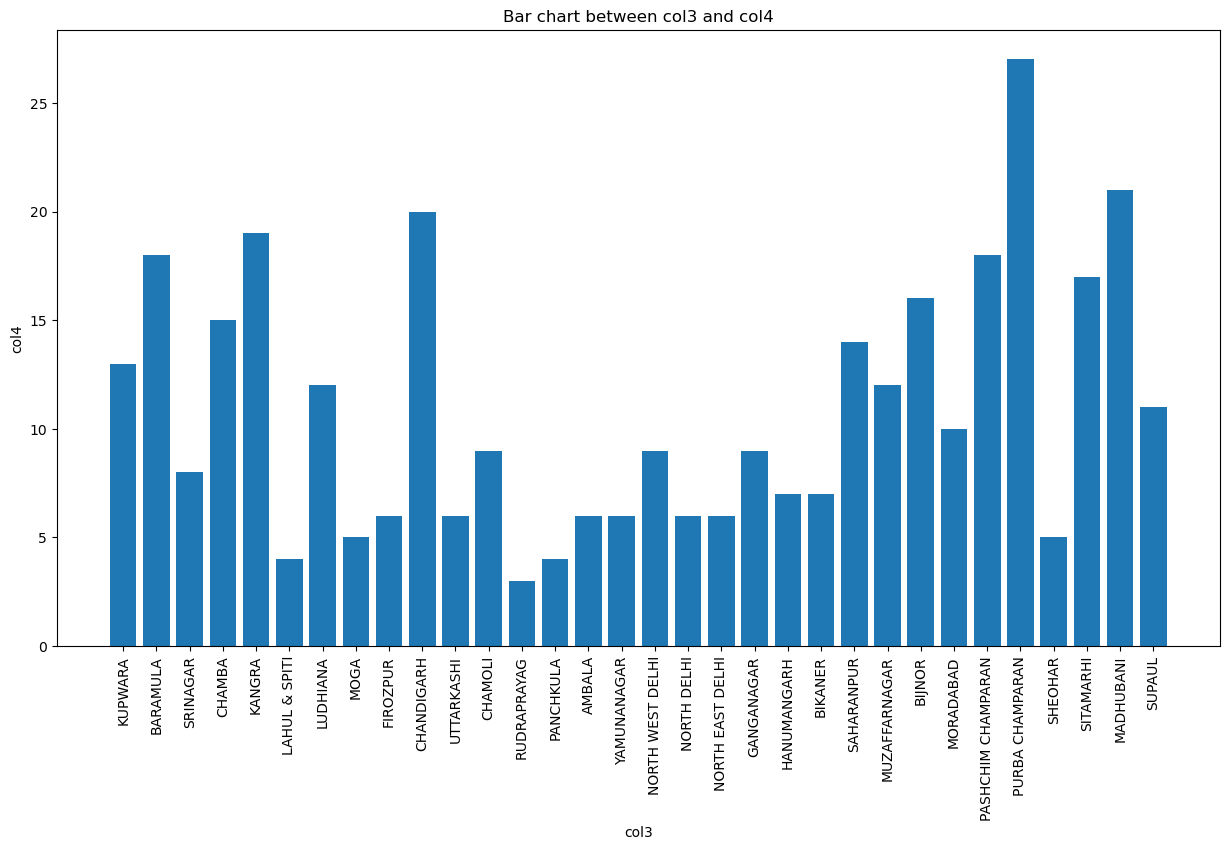

In [43]:
plt.figure(figsize=(15,8))
plt.bar(x=df1['DISTNAME'], height=df1['BLOCKS'])
plt.title('Bar chart between col3 and col4')
plt.xticks(rotation=90)
plt.xlabel('col3')
plt.ylabel('col4')
plt.show()

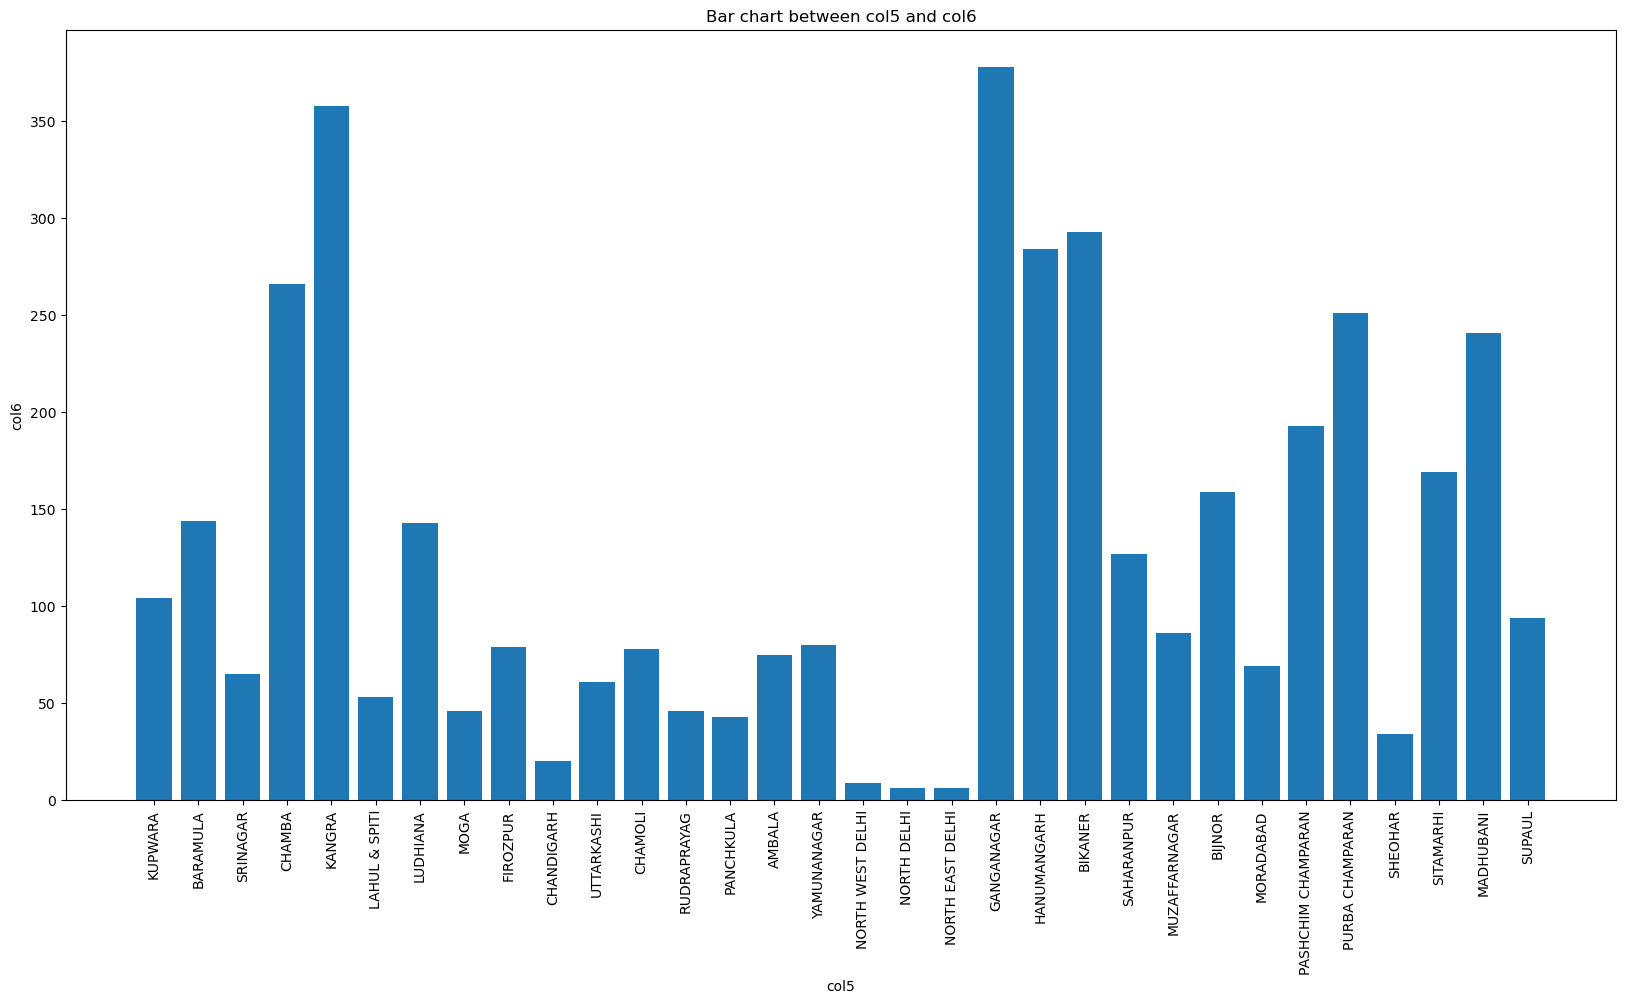

In [46]:
plt.figure(figsize=(20,10))
plt.bar(x=df1['DISTNAME'], height=df1['CLUSTERS'])
plt.title('Bar chart between col5 and col6')#two numeric not proper so
plt.xticks(rotation=90)
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()

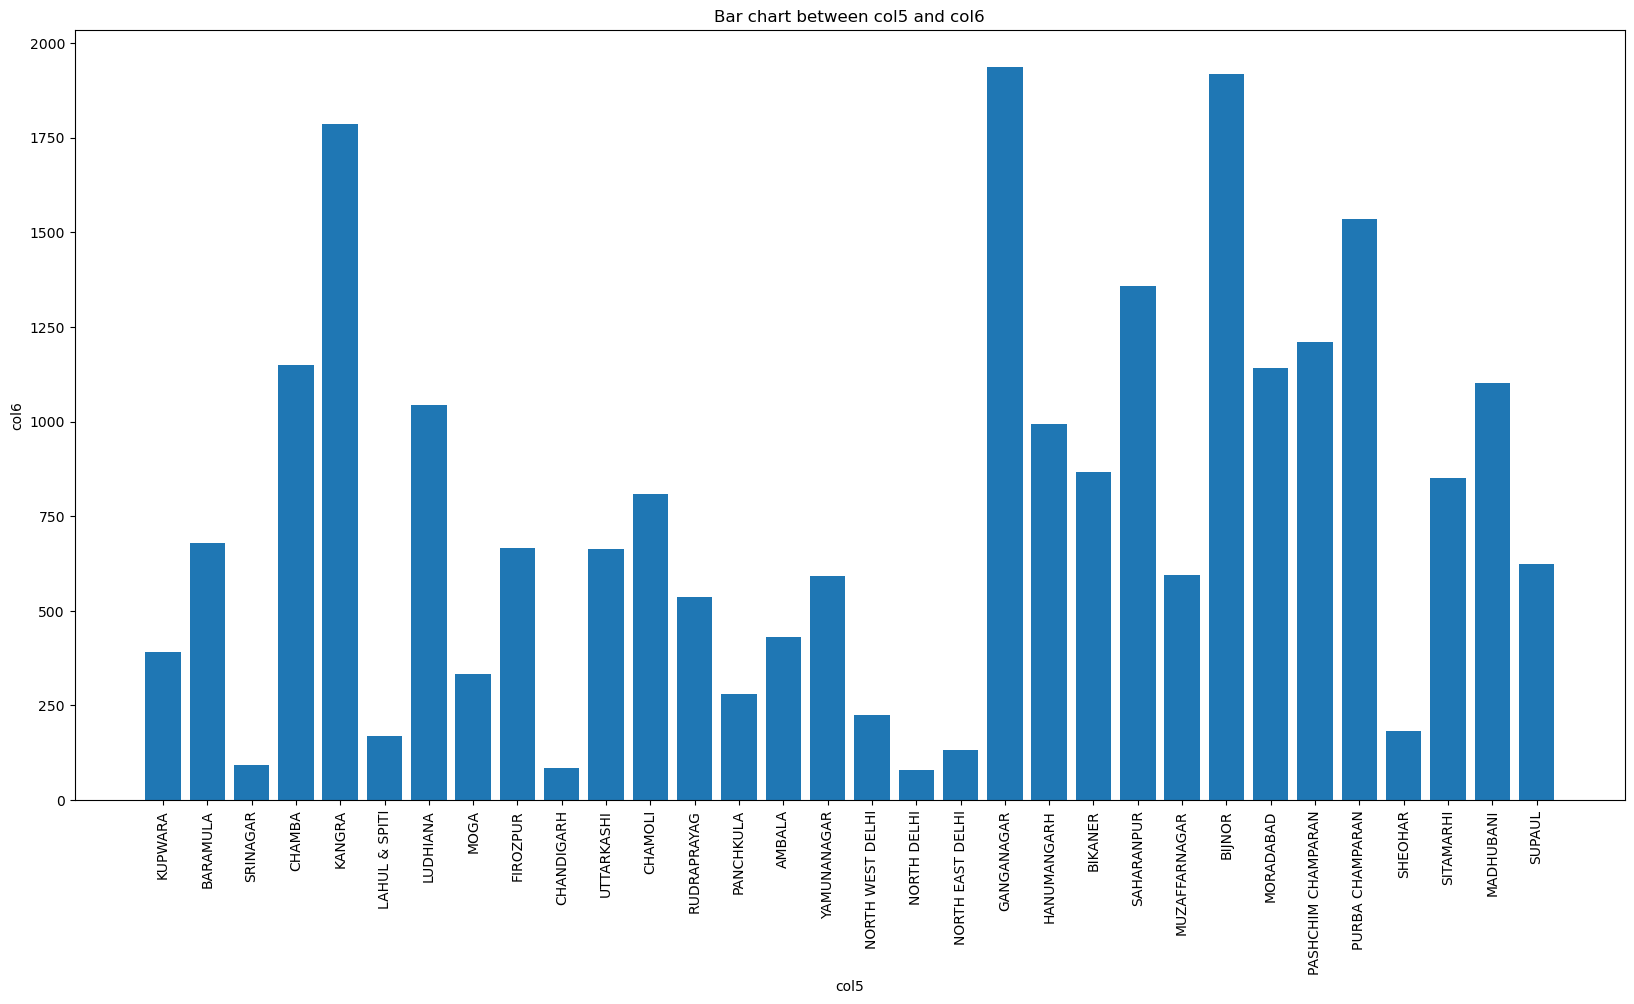

In [47]:
plt.figure(figsize=(20,10))
plt.bar(x=df1['DISTNAME'], height=df1['VILLAGES'])
plt.title('Bar chart between col5 and col6')#two numeric not proper so
plt.xticks(rotation=90)
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()

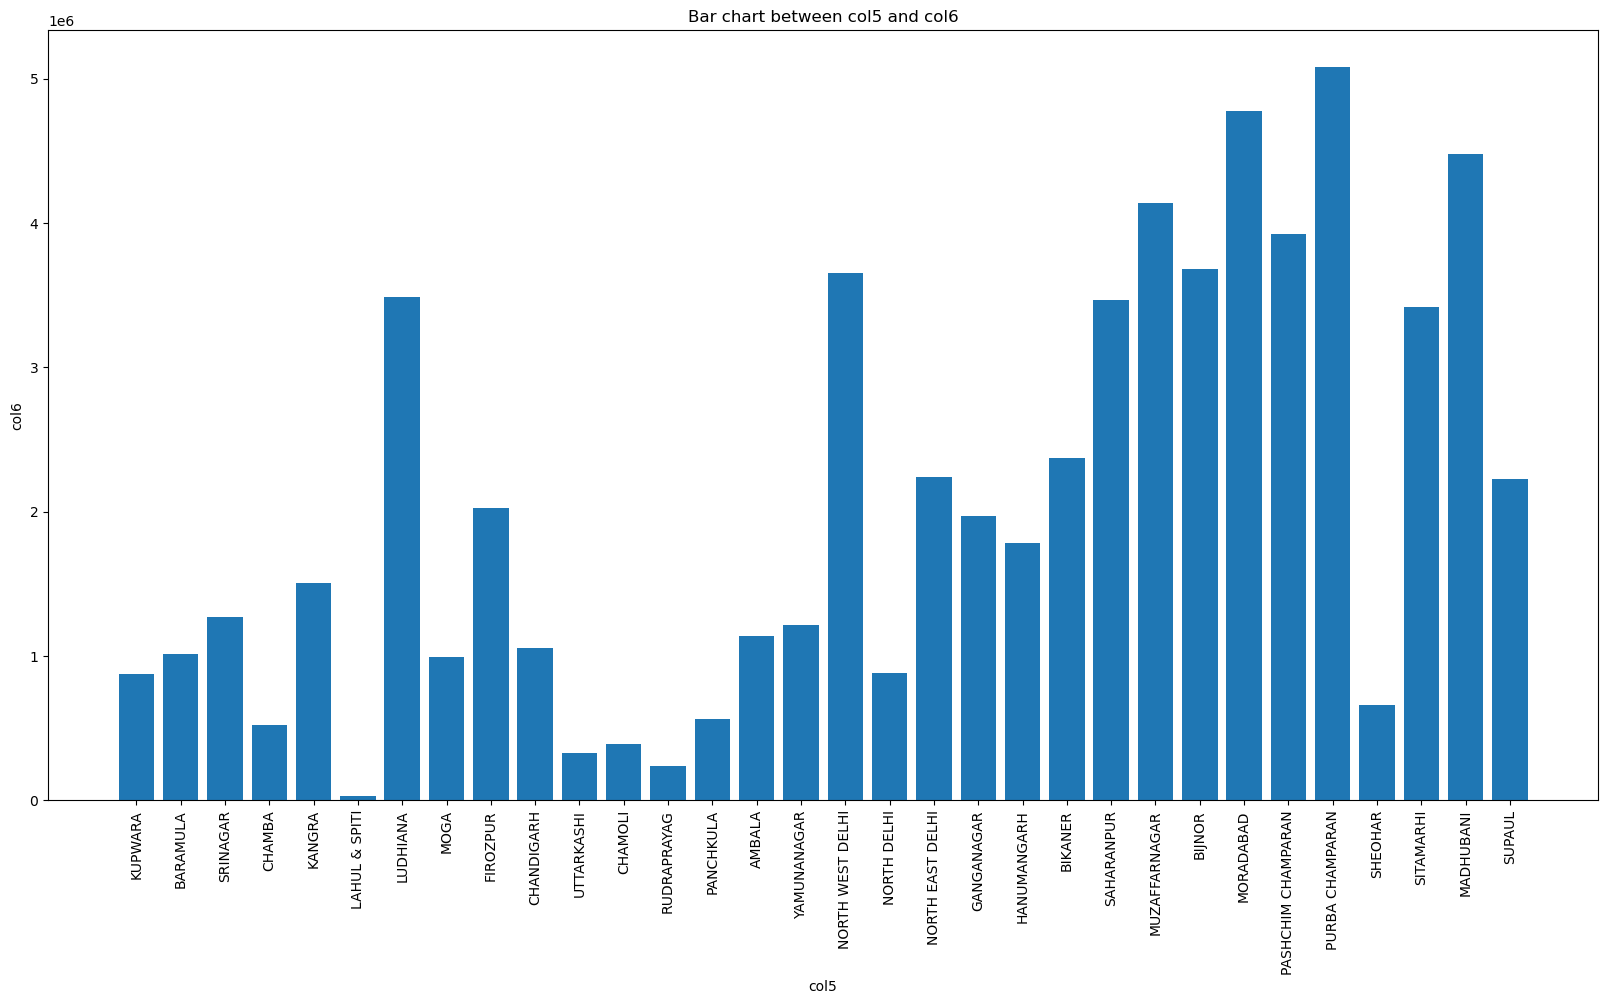

In [49]:
plt.figure(figsize=(20,10))
plt.bar(x=df1['DISTNAME'], height=df1['TOTPOPULAT'])
plt.title('Bar chart between col5 and col6')#two numeric not proper so
plt.xticks(rotation=90)
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()

### d. Histograms to depict the dataset's distribution

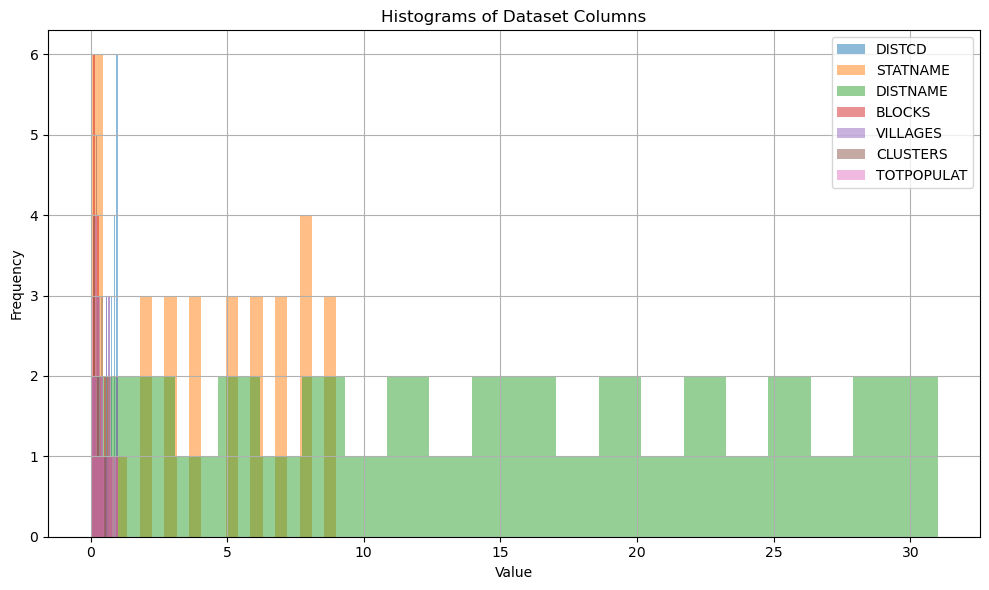

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

num_bins = 20  

for col in df.columns:
    plt.hist(df[col], bins=num_bins, alpha=0.5, label=col)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Dataset Columns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


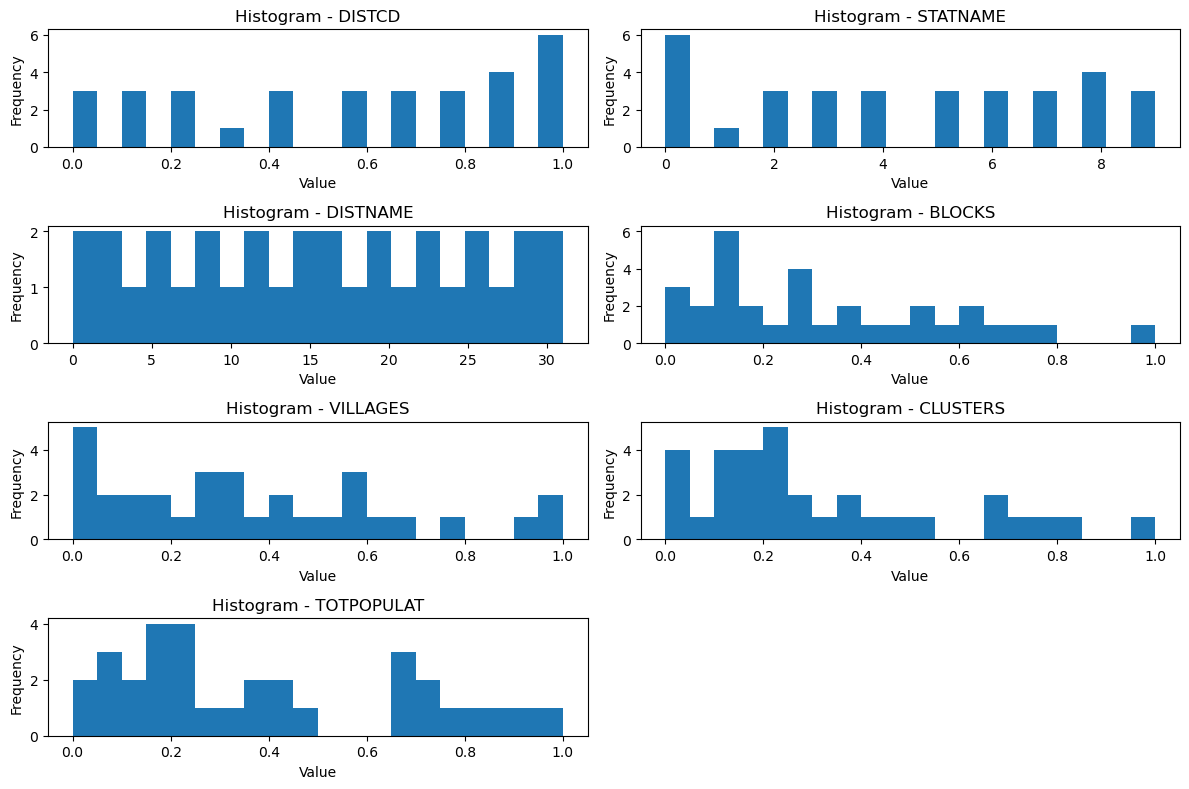

In [51]:
import matplotlib.pyplot as plt

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Using Seaborn Library

### a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

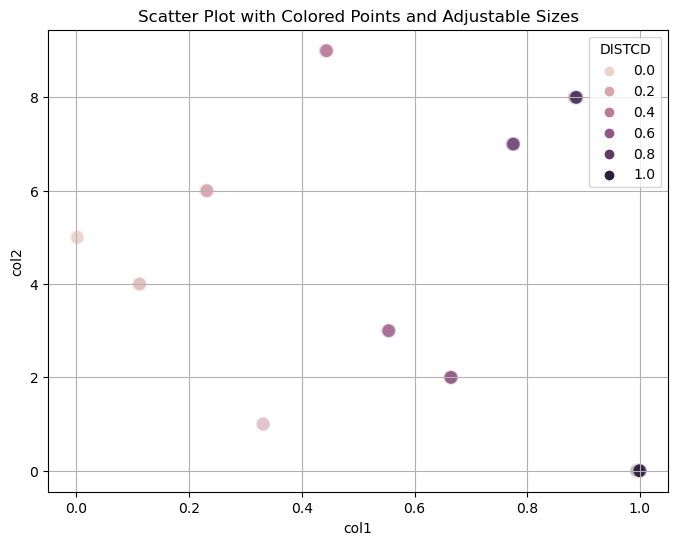

In [56]:
col1 = df['DISTCD']
col2 = df['STATNAME']


plt.figure(figsize=(8, 6))
sns.scatterplot(x=col1, y=col2, data=df, alpha=0.5, s=100, hue=col1)


plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

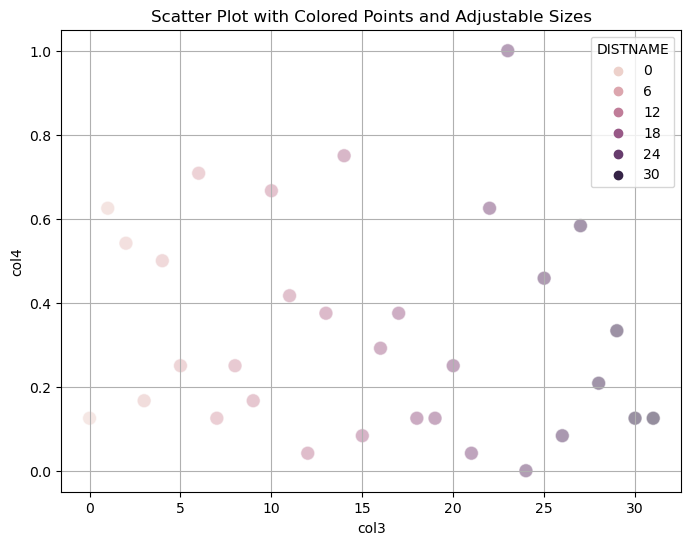

In [57]:
col3 = df['DISTNAME']
col4 = df['BLOCKS']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=col3, y=col4, data=df, alpha=0.5, s=100, hue=col3)

plt.xlabel('col3')
plt.ylabel('col4')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()


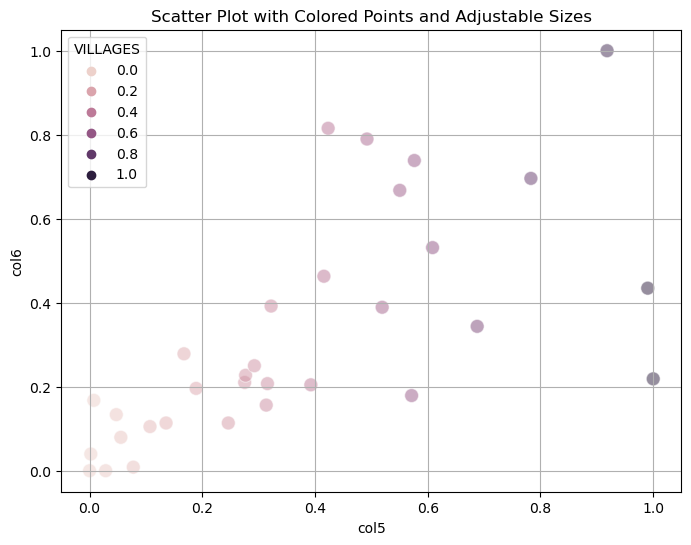

In [61]:
col5 = df['VILLAGES']
col6 = df['CLUSTERS']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=col5, y=col6, data=df, alpha=0.5, s=100, hue=col5)

plt.xlabel('col5')
plt.ylabel('col6')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()


### b. line plots using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

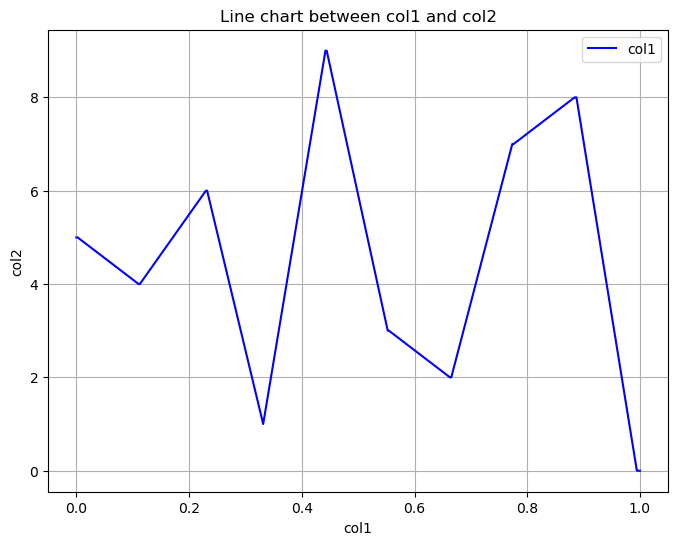

In [64]:
plt.figure(figsize=(8, 6))

# Line chart for col1 and col2
sns.lineplot(x=df['DISTCD'], y=df['STATNAME'], color='blue', label='col1')
plt.title('Line chart between col1 and col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.grid(True)
plt.show()

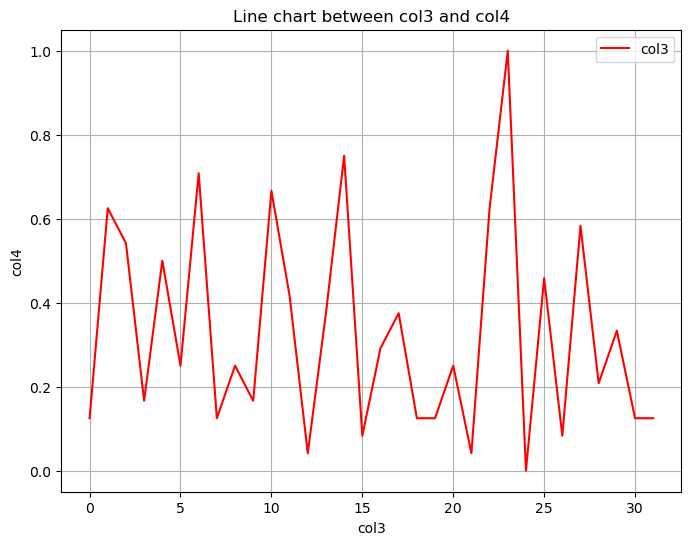

In [65]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['DISTNAME'], y=df['BLOCKS'], color='red', label='col3')
plt.title('Line chart between col3 and col4')
plt.xlabel('col3')
plt.ylabel('col4')
plt.grid(True)
plt.show()


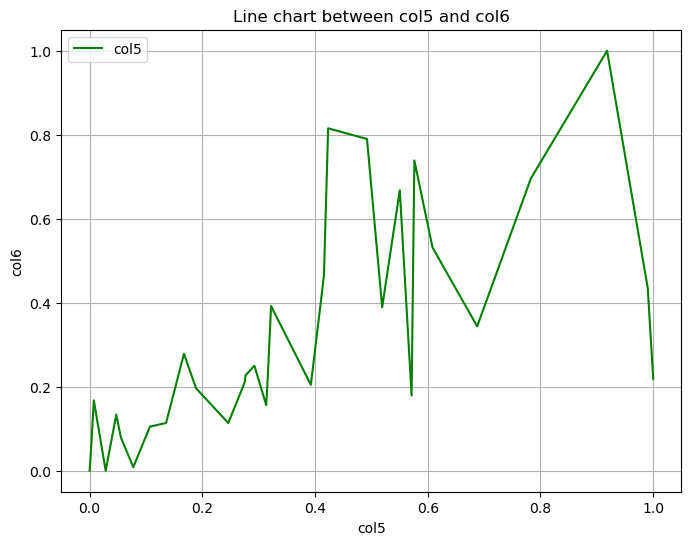

In [66]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['VILLAGES'], y=df['CLUSTERS'], color='green', label='col5')
plt.title('Line chart between col5 and col6')
plt.xlabel('col5')
plt.ylabel('col6')
plt.grid(True)
plt.show()


### c. Bar plots using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

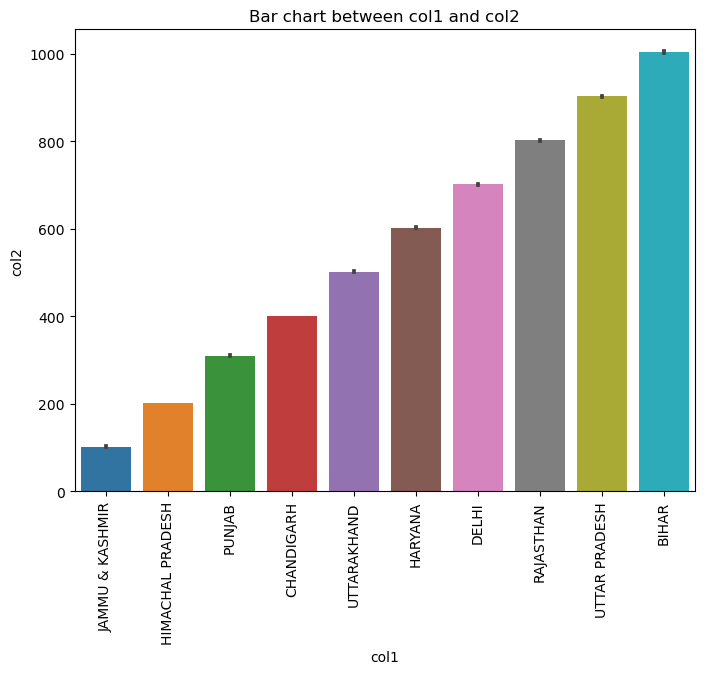

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1['STATNAME'], y=df1['DISTCD'])
plt.title('Bar chart between col1 and col2')
plt.xticks(rotation=90)
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()

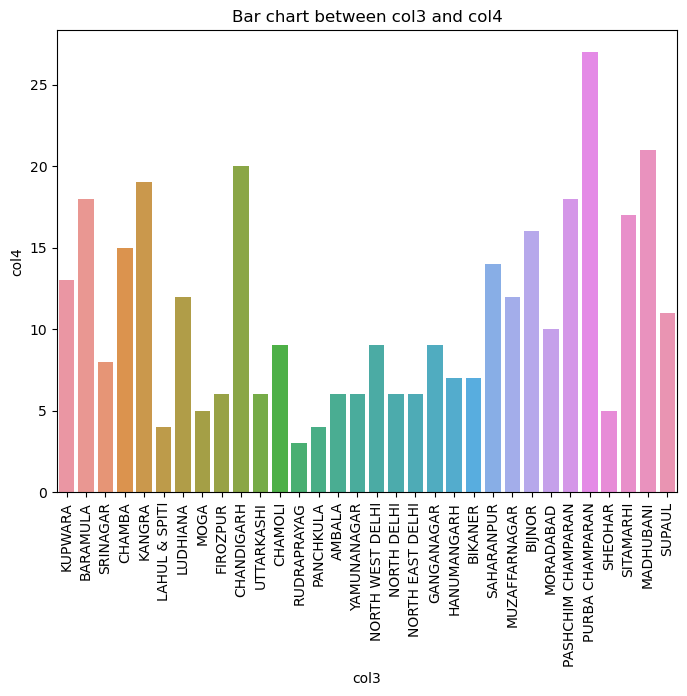

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df1['BLOCKS'], x=df1['DISTNAME'])
plt.title('Bar chart between col3 and col4')
plt.xticks(rotation=90)
plt.xlabel('col3')
plt.ylabel('col4')
plt.show()

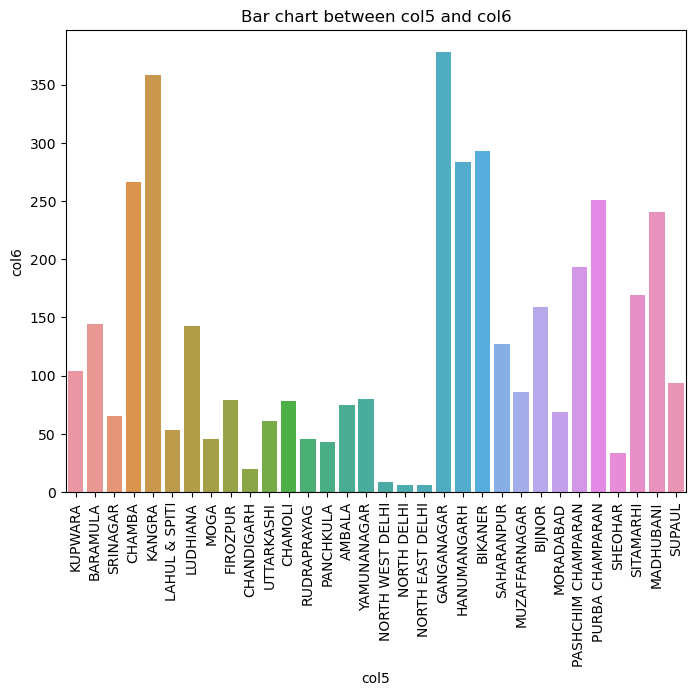

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df1['CLUSTERS'], x=df1['DISTNAME'])
plt.title('Bar chart between col5 and col6')
plt.xticks(rotation=90)
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()

### e.histogram to depict the distribution of the data 

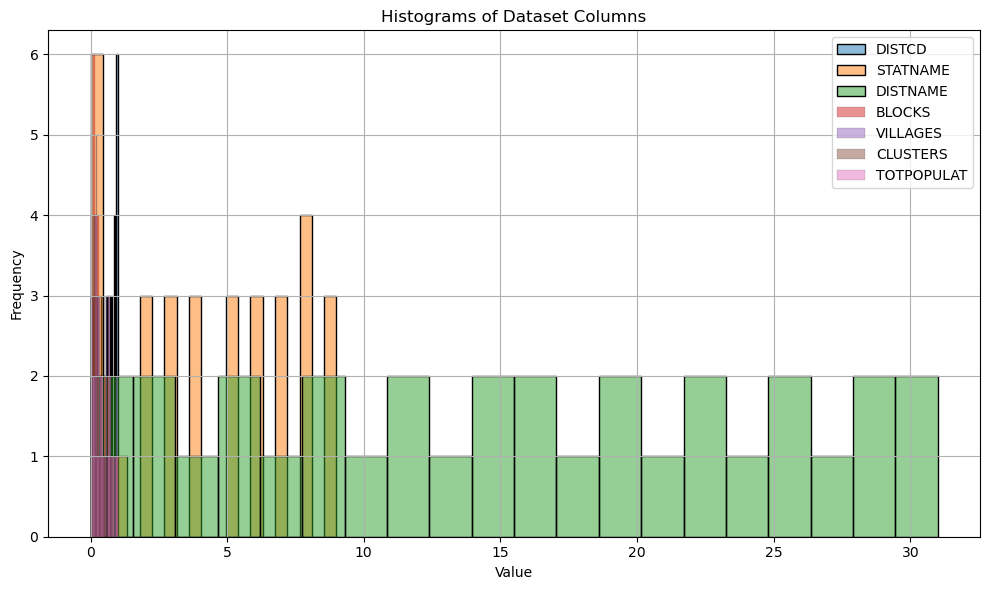

In [72]:
plt.figure(figsize=(10, 6))

num_bins = 20  

for col in df.columns:
    sns.histplot(df[col], bins=num_bins, alpha=0.5, label=col)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Dataset Columns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

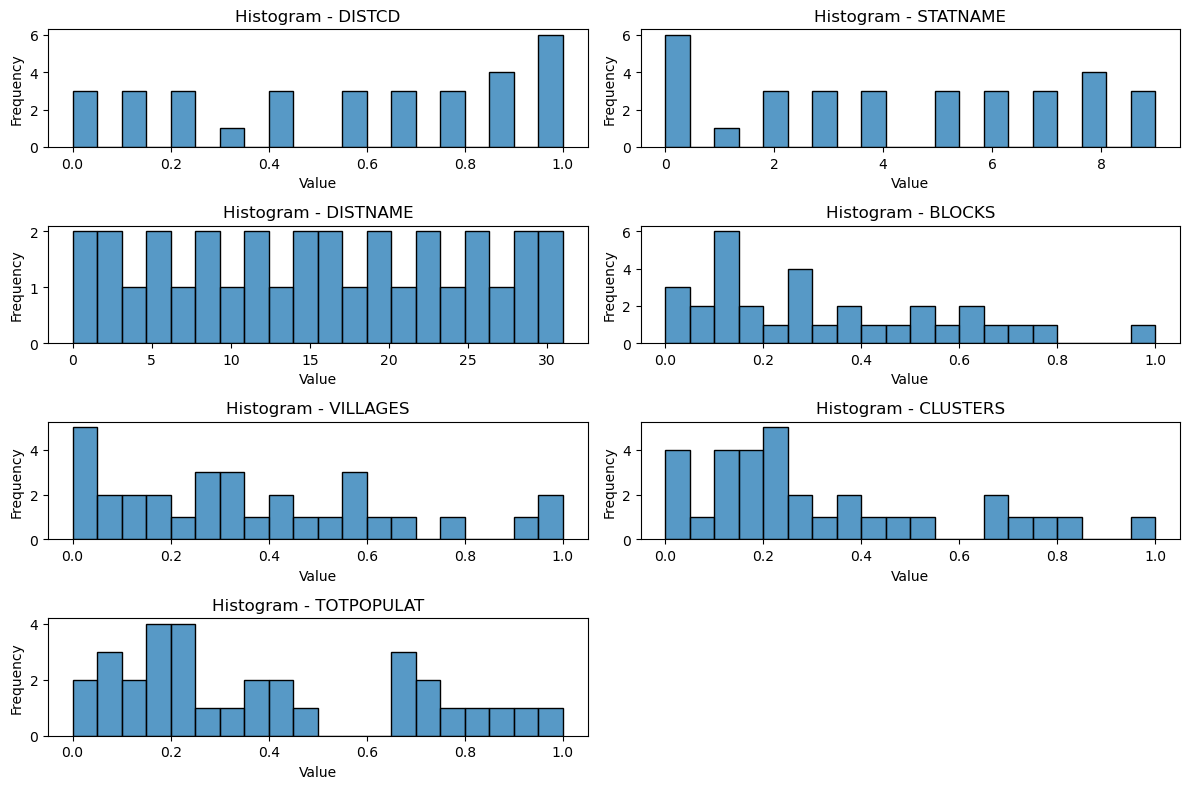

In [73]:
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(df[col], bins=20)
    plt.title(f'Histogram - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Using Bokeh Library

### a.Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

In [86]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Select, CustomJS

# Enable Bokeh to display in the notebook
output_notebook()

# Assume df is your DataFrame with col1, col2, col3, col4 columns

# Create ColumnDataSources for each set of data
source1 = ColumnDataSource(data=dict(x=df['VILLAGES'], y=df['CLUSTERS']))
source2 = ColumnDataSource(data=dict(x=df['DISTNAME'], y=df['BLOCKS']))
source3 = ColumnDataSource(data=dict(x=df['DISTCD'], y=df['STATNAME']))

# Create a figure
p = figure(title="Scatter Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')

# Plot the initial scatter plot (first set of data)
scatter = p.circle('x', 'y', size=10, color='red', source=source1)

# Create a dropdown menu to switch between data sources
select = Select(title="Select Data:", value="VILLAGES", options=["VILLAGES", "DISTNAME", "DISTCD"])

# Define a callback function to update the scatter plot based on the dropdown selection
callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, scatter=scatter), code="""
    const data = cb_obj.value;
    if (data === 'VILLAGES') {
        scatter.data_source.data = source1.data;
    } else if (data === 'DISTNAME') {
        scatter.data_source.data = source2.data;
    } else if (data === 'DISTCD') {
        scatter.data_source.data = source3.data;
    }
    scatter.change.emit();
""")

select.js_on_change('value', callback)

# Show the plot and dropdown in the notebook
show(column(select, p))




Loading BokehJS ...

### b.Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [88]:

output_notebook()

source1 = ColumnDataSource(data=dict(x=df['VILLAGES'], y=df['CLUSTERS']))
source2 = ColumnDataSource(data=dict(x=df['DISTNAME'], y=df['BLOCKS']))
source3 = ColumnDataSource(data=dict(x=df['DISTCD'], y=df['STATNAME']))

p = figure(title="Line Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')

line = p.line('x', 'y', line_width=2, color='red', source=source1)

select = Select(title="Select Data:", value="VILLAGES", options=["VILLAGES", "DISTNAME", "DISTCD"])

callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, line=line), code="""
    const data = cb_obj.value;
    if (data === 'VILLAGES') {
        line.data_source.data = source1.data;
    } else if (data === 'DISTNAME') {
        line.data_source.data = source2.data;
    } else if (data === 'DISTCD') {
        line.data_source.data = source3.data;
    }
    line.change.emit();
""")

select.js_on_change('value', callback)

show(column(select, p))


Loading BokehJS ...

### c.Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [89]:


output_notebook()

source1 = ColumnDataSource(data=dict(x=df['VILLAGES'], y=df['CLUSTERS']))
source2 = ColumnDataSource(data=dict(x=df['DISTNAME'], y=df['BLOCKS']))
source3 = ColumnDataSource(data=dict(x=df['DISTCD'], y=df['STATNAME']))

p = figure(title="Bar Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')

bar = p.vbar(x='x', top='y', width=0.5, color='red', source=source1)

select = Select(title="Select Data:", value="VILLAGES", options=["VILLAGES", "DISTNAME", "DISTCD"])

callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, bar=bar), code="""
    const data = cb_obj.value;
    if (data === 'VILLAGES') {
        bar.data_source.data = source1.data;
    } else if (data === 'DISTNAME') {
        bar.data_source.data = source2.data;
    } else if (data === 'DISTCD') {
        bar.data_source.data = source3.data;
    }
    bar.change.emit();
""")

select.js_on_change('value', callback)

show(column(select, p))


Loading BokehJS ...

### d.Histograms to depict the dataset's distribution.

In [92]:

p = figure(title="Histogram for Dataset's Distribution")

hist, edges = np.histogram(df, bins=20)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white")

show(p)


# Using Plotly Library

### a.Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

In [93]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create traces for scatter plots
trace1 = go.Scatter(x=df['VILLAGES'], y=df['CLUSTERS'], mode='markers', name='Villages vs Clusters')
trace2 = go.Scatter(x=df['DISTNAME'], y=df['BLOCKS'], mode='markers', name='Distname vs Blocks')
trace3 = go.Scatter(x=df['DISTCD'], y=df['STATNAME'], mode='markers', name='Distcd vs Statname')

# Create data and layout for scatter plot
scatter_data = [trace1, trace2, trace3]
scatter_layout = go.Layout(title='Scatter Plot with Dropdown')

# Create dropdown menu
scatter_dropdown = [{'label': 'Villages vs Clusters', 'method': 'update', 'args': [{'y': [df['CLUSTERS']], 'x': [df['VILLAGES']]}]},
                    {'label': 'Distname vs Blocks', 'method': 'update', 'args': [{'y': [df['BLOCKS']], 'x': [df['DISTNAME']]}]},
                    {'label': 'Distcd vs Statname', 'method': 'update', 'args': [{'y': [df['STATNAME']], 'x': [df['DISTCD']]}]}]

scatter_layout.update(updatemenus=[{'buttons': scatter_dropdown}])

# Create and display scatter plot
scatter_fig = go.Figure(data=scatter_data, layout=scatter_layout)
pyo.iplot(scatter_fig)


### b.Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [94]:
# Create traces for line plots
trace1_line = go.Scatter(x=df['VILLAGES'], y=df['CLUSTERS'], mode='lines', name='Villages vs Clusters')
trace2_line = go.Scatter(x=df['DISTNAME'], y=df['BLOCKS'], mode='lines', name='Distname vs Blocks')
trace3_line = go.Scatter(x=df['DISTCD'], y=df['STATNAME'], mode='lines', name='Distcd vs Statname')

# Create data and layout for line plot
line_data = [trace1_line, trace2_line, trace3_line]
line_layout = go.Layout(title='Line Plot with Dropdown')

# Create dropdown menu
line_dropdown = [{'label': 'Villages vs Clusters', 'method': 'update', 'args': [{'y': [df['CLUSTERS']], 'x': [df['VILLAGES']]}]},
                 {'label': 'Distname vs Blocks', 'method': 'update', 'args': [{'y': [df['BLOCKS']], 'x': [df['DISTNAME']]}]},
                 {'label': 'Distcd vs Statname', 'method': 'update', 'args': [{'y': [df['STATNAME']], 'x': [df['DISTCD']]}]}]

line_layout.update(updatemenus=[{'buttons': line_dropdown}])

# Create and display line plot
line_fig = go.Figure(data=line_data, layout=line_layout)
pyo.iplot(line_fig)


### c.Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6

In [95]:
# Create traces for bar plots
trace1_bar = go.Bar(x=df['VILLAGES'], y=df['CLUSTERS'], name='Villages vs Clusters')
trace2_bar = go.Bar(x=df['DISTNAME'], y=df['BLOCKS'], name='Distname vs Blocks')
trace3_bar = go.Bar(x=df['DISTCD'], y=df['STATNAME'], name='Distcd vs Statname')

# Create data and layout for bar plot
bar_data = [trace1_bar, trace2_bar, trace3_bar]
bar_layout = go.Layout(barmode='group', title='Bar Plot with Dropdown')

# Create dropdown menu
bar_dropdown = [{'label': 'Villages vs Clusters', 'method': 'update', 'args': [{'y': [df['CLUSTERS']], 'x': [df['VILLAGES']]}]},
                {'label': 'Distname vs Blocks', 'method': 'update', 'args': [{'y': [df['BLOCKS']], 'x': [df['DISTNAME']]}]},
                {'label': 'Distcd vs Statname', 'method': 'update', 'args': [{'y': [df['STATNAME']], 'x': [df['DISTCD']]}]}]

bar_layout.update(updatemenus=[{'buttons': bar_dropdown}])

# Create and display bar plot
bar_fig = go.Figure(data=bar_data, layout=bar_layout)
pyo.iplot(bar_fig)


### d.histograms to depict the dataset's distribution.

In [97]:
import plotly.express as px
fig = px.histogram(df)
fig.show()
